In [1]:
# Dependencies
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem

# Set the seed so our data is reproducible
random.seed(42)

In [2]:
# Sample versus population example fuel economy
fuel_economy = pd.read_csv('../Resources/2019_fuel_economy.csv')

# First overview the data set - how many factors, etc.
print(fuel_economy.head())

          Type  Combined_MPG                           Make_Model
0  Two Seaters       21.0000                            Acura_NSX
1  Two Seaters       27.9406                        ALFA ROMEO_4C
2  Two Seaters       20.9455  Aston Martin Lagonda Ltd_Vantage V8
3  Two Seaters       25.9952             Audi_TT Roadster quattro
4  Two Seaters       27.6300                     BMW_Z4 sDrive30i


The mean MPG of all vehicles is: 23.33
The standard deviation of all vehicle's MPG is: 5.94


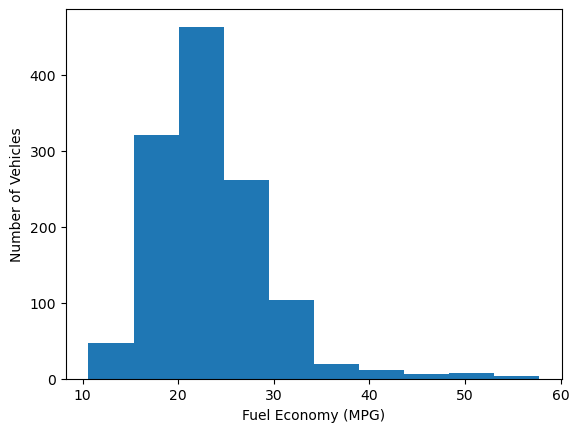

In [3]:
# Calculate the summary statistics and plot the histogram of the entire population data
print(f"The mean MPG of all vehicles is: {round(fuel_economy['Combined_MPG'].mean(),2)}")
print(f"The standard deviation of all vehicle's MPG is: {round(fuel_economy['Combined_MPG'].std(),2)}")
plt.hist(fuel_economy['Combined_MPG'])
plt.xlabel("Fuel Economy (MPG)")
plt.ylabel("Number of Vehicles")
plt.show()

The mean MPG of all vehicles is: 18.48
The standard deviation of all vehicle's MPG is: 2.41


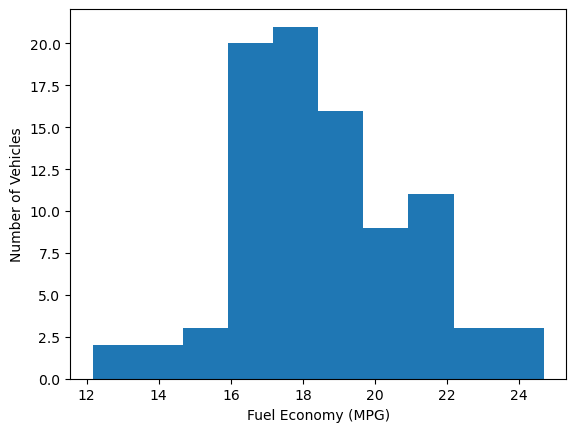

In [4]:
# Calculate the summary statistics and plot the histogram of the sample data using iloc
subset = fuel_economy.iloc[range(766,856)]
print(f"The mean MPG of all vehicles is: {round(subset['Combined_MPG'].mean(),2)}")
print(f"The standard deviation of all vehicle's MPG is: {round(subset['Combined_MPG'].std(),2)}")
plt.hist(subset['Combined_MPG'])
plt.xlabel("Fuel Economy (MPG)")
plt.ylabel("Number of Vehicles")
plt.show()

The mean MPG of all vehicles is: 24.21
The standard deviation of all vehicle's MPG is: 6.49


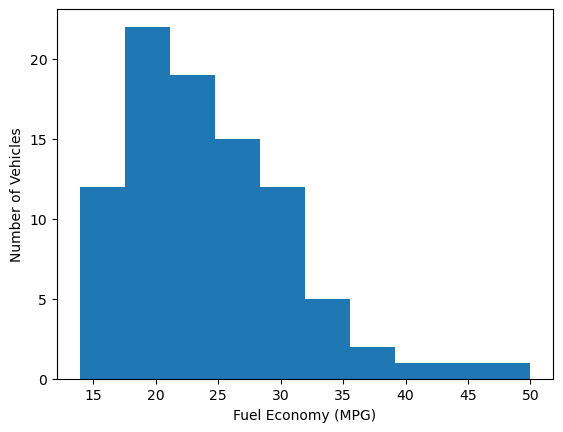

In [5]:
# Calculate the summary statistics and plot the histogram of the sample data using random sampling
subset = fuel_economy.sample(90)
print(f"The mean MPG of all vehicles is: {round(subset['Combined_MPG'].mean(),2)}")
print(f"The standard deviation of all vehicle's MPG is: {round(subset['Combined_MPG'].std(),2)}")
plt.hist(subset['Combined_MPG'])
plt.xlabel("Fuel Economy (MPG)")
plt.ylabel("Number of Vehicles")
plt.show()

In [6]:
# Generate a new 30 vehicle sample and calculate the SEM of the sample
sample = fuel_economy.sample(30)
print(f"The SEM value for the sample fuel economy data is {sem(sample['Combined_MPG'])}")

The SEM value for the sample fuel economy data is 0.8550949670547567


In [7]:
# Create a sample set of 10, each with 30 vehicles
vehicle_sample_set = [fuel_economy.sample(30) for x in range(0,10)]

In [8]:
# Generate the plot data for each sample 
means = [sample['Combined_MPG'].mean() for sample in vehicle_sample_set]
standard_errors = [sem(sample['Combined_MPG']) for sample in vehicle_sample_set]
x_axis = np.arange(0, len(vehicle_sample_set), 1) + 1

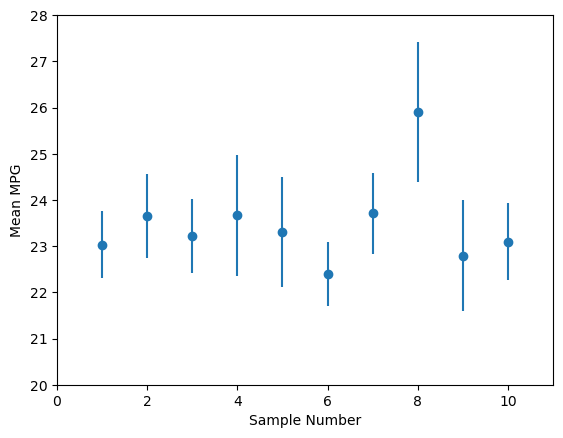

In [9]:
# Setting up the plot
fig, ax = plt.subplots()
ax.errorbar(x_axis, means, standard_errors, fmt="o")
ax.set_xlim(0, len(vehicle_sample_set) + 1)
ax.set_ylim(20,28)
ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean MPG")
plt.show()